In [2]:
# 코랩에서 한글 그래프 적용하려면(세션 다시 시작)
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Sudo媛� �씠 而댄벂�꽣�뿉�꽌 �궗�슜�븯吏� �븡�룄濡� �꽕�젙�릺�뼱 �엳�뒿�땲�떎. �궗�슜�븯�룄濡� �꽕�젙�븯�젮硫� �쑝濡� �씠�룞�븯�꽭�슂. ]8;;ms-settings:developers\Developer Settings page]8;;\ �꽕�젙 �빋�쓽
Sudo媛� �씠 而댄벂�꽣�뿉�꽌 �궗�슜�븯吏� �븡�룄濡� �꽕�젙�릺�뼱 �엳�뒿�땲�떎. �궗�슜�븯�룄濡� �꽕�젙�븯�젮硫� �쑝濡� �씠�룞�븯�꽭�슂. ]8;;ms-settings:developers\Developer Settings page]8;;\ �꽕�젙 �빋�쓽
'rm'은(는) 내부 또는 외부 명령, 실행할 수 있는 프로그램, 또는
배치 파일이 아닙니다.


In [2]:
%pip install konlpy

   ---------------------------------------- 0.0/19.4 MB ? eta -:--:--
   ---------------- ----------------------- 7.9/19.4 MB 53.9 MB/s eta 0:00:01
   ---------------------------------------  19.4/19.4 MB 55.6 MB/s eta 0:00:01
   ---------------------------------------- 19.4/19.4 MB 51.1 MB/s  0:00:00
   ---------------------------------------- 0.0/4.0 MB ? eta -:--:--
   ---------------------------------------- 4.0/4.0 MB 48.3 MB/s  0:00:00

   -------------------------- ------------- 2/3 [konlpy]
   ---------------------------------------- 3/3 [konlpy]

Note: you may need to restart the kernel to use updated packages.


In [3]:
%pip install python-mecab-ko

   ---------------------------------------- 0.0/652.4 kB ? eta -:--:--
   ---------------------------------------- 652.4/652.4 kB 12.6 MB/s  0:00:00
   ---------------------------------------- 0.0/34.5 MB ? eta -:--:--
   ------ --------------------------------- 5.8/34.5 MB 27.0 MB/s eta 0:00:02
   ------------- -------------------------- 12.1/34.5 MB 29.0 MB/s eta 0:00:01
   ----------------- ---------------------- 14.7/34.5 MB 30.7 MB/s eta 0:00:01
   ------------------- -------------------- 16.8/34.5 MB 20.7 MB/s eta 0:00:01
   ----------------------------- ---------- 25.2/34.5 MB 25.7 MB/s eta 0:00:01
   ---------------------------------------  34.3/34.5 MB 28.7 MB/s eta 0:00:01
   ---------------------------------------- 34.5/34.5 MB 28.1 MB/s  0:00:01

   ---------------------------------------- 0/2 [python-mecab-ko-dic]
   ---------------------------------------- 2/2 [python-mecab-ko]

Note: you may need to restart the kernel to use updated packages.


In [4]:
# 한글 말뭉치
from konlpy.corpus import kolaw
# data = kolaw.open('constitution.txt').readlines() # 한줄씩 list로 반환
data = kolaw.open('constitution.txt').read()
print('글자수 :',len(data))

글자수 : 18884


In [5]:
from mecab import MeCab
analyzer = MeCab() # mecab, Kkma의 경우 NNG, NNP / Okt의 경우 None
noun_list = [word for word, tag in analyzer.pos(data) if tag in ('NNG',
                                                                 'NNP')]
data_noun = ' '.join(noun_list)
print(data_noun[:20])

대한민국 헌법 역사 전통 국민 운동 


In [9]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
img = Image.open('/content/drive/MyDrive/nlp_ex/data/south_korea.png').convert('RGB')
mask = np.array(img)
plt.imshow(mask)
print(mask.shape)

FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/MyDrive/nlp_ex/data/south_korea.png'

In [10]:
from wordcloud import WordCloud
wordcloud = WordCloud(
    font_path='/content/drive/MyDrive/nlp_ex/data/NanumPenScript-Regular.ttf', # 한글의 경우 폰트 설정 요망
    background_color='white',  # 배경색
    max_words=300,        # 표시될 단어의 최대 갯수
    #relative_scaling=0.6 # 단어 빈도에 따른 크기 차이 조정
    colormap='viridis', # 글씨 컬러맵
    mask=mask,
   contour_color='red', # 테두리 색상
   contour_width=1 # 테두리 두께
)
wordcloud.generate(data_noun)
plt.figure(figsize=(18,5))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

ModuleNotFoundError: No module named 'wordcloud'

In [9]:
wordcloud.to_file('/content/drive/MyDrive/nlp_ex/data/korea.jpg')

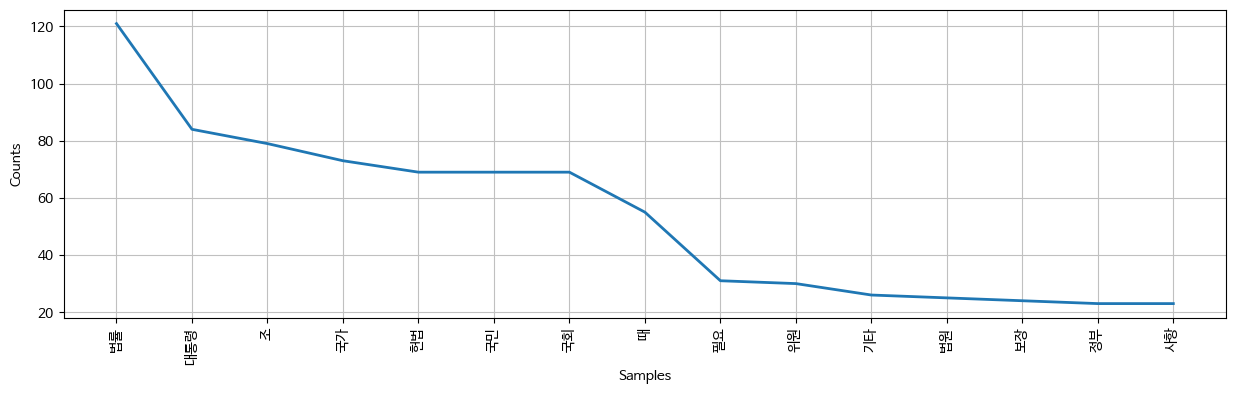

In [5]:
# 단어의 빈도수를 그래프로 시각화(nltk.Text)
import nltk
import matplotlib.pyplot as plt
data_text = nltk.Text(noun_list)
plt.figure(figsize=(15,4))
#plt.rc('font', family='Malgun Gothic') # 윈도우즈에서 한글 처리
plt.rc('font', family='NanumBarunGothic') # 코랩
data_text.plot(15)
plt.show()